In [77]:
import numpy as np
import pandas as pd

In [78]:
#df = pd.read_csv('/content/placement.csv')
df = pd.read_csv('placement.csv')

In [80]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [82]:
df.shape

(100, 4)

In [83]:
df = df.iloc[:,1:] #sary rows aur columb 1 se agy waly sary select kiye

In [84]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values  -1 se 1 ki range me ly aty hy values ko
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection select best model
# 6. Deploy the model

In [85]:
import matplotlib.pyplot as plt


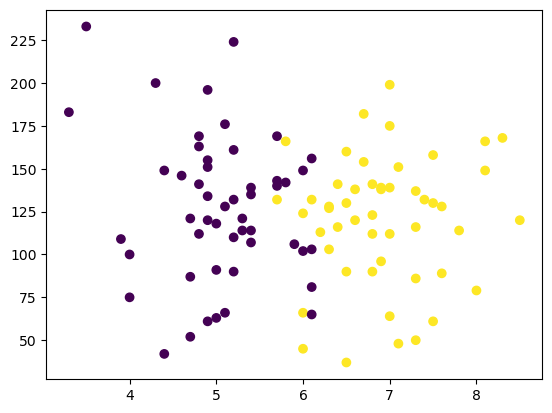

In [86]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) 

In [87]:
#input aur output columbs ko alg kry gy data se independent(input) aur dependent(output) variables ko
X = df.iloc[:,0:2] #independent variables, sary rows aur columb 0 se 1 tk
y = df.iloc[:,-1]  #dependent variables , sary rows aur last wala columb

In [88]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [89]:
y.shape

(100,)

In [90]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1) #0.1 ka matlab 10% data testing k liye hy, ye testing aur training data ko split krta hy

In [91]:
X_train

,cgpa,iq
73,4.9,61.0
30,7.6,128.0
87,5.7,132.0
74,6.7,154.0
99,6.2,113.0
...,...,...
92,5.2,110.0
16,5.2,224.0
24,4.7,121.0
43,6.8,141.0


In [93]:
y_train #placement wala columb esmy hoga

73    0
30    1
87    1
74    1
99    1
     ..
92    0
16    0
24    0
43    1
8     0
Name: placement, Length: 90, dtype: int64

In [94]:
X_test

,cgpa,iq
53,8.3,168.0
59,4.8,112.0
70,6.3,127.0
58,8.0,79.0
54,6.4,141.0
26,7.0,199.0
23,4.7,87.0
28,5.2,90.0
31,3.9,109.0
7,5.0,63.0


In [95]:
from sklearn.preprocessing import StandardScaler #values ki scaling k liye

In [96]:
scaler = StandardScaler() #object bnaya

In [97]:
X_train = scaler.fit_transform(X_train) #x train ka data transform ho gya

In [98]:
X_train

array([[-0.99101137, -1.5954604 ],
       [ 1.45381872,  0.09444408],
       [-0.26661727,  0.1953339 ],
       [ 0.63887535,  0.75022791],
       [ 0.18612904, -0.28389274],
       [-0.99101137,  0.77545037],
       [ 0.2766783 , -0.53611729],
       [ 0.63887535,  1.45645665],
       [ 1.0010724 , -1.92335232],
       [-0.80991285,  0.09444408],
       [ 0.09557978, -1.0910113 ],
       [-0.80991285, -1.46934813],
       [-0.99101137,  0.67456055],
       [-0.90046211, -0.15778047],
       [-1.44375769,  0.62411564],
       [-1.53430695,  1.91046084],
       [-1.1721099 , -1.8224625 ],
       [-0.53826506, -0.25867029],
       [ 0.09557978, -0.53611729],
       [ 0.09557978, -1.49457058],
       [-1.08156064,  0.422336  ],
       [ 0.54832609, -0.10733556],
       [ 1.18217093,  0.32144618],
       [ 2.26876208, -0.10733556],
       [ 0.54832609,  0.34666863],
       [-0.53826506,  0.27100127],
       [-0.17606801,  1.05289737],
       [-0.53826506, -0.43522747],
       [-0.99101137,

In [99]:
X_test = scaler.transform(X_test) #ab x test ko transform kiya

In [100]:
X_test

array([[ 2.08766355,  1.10334228],
       [-1.08156064, -0.3091152 ],
       [ 0.2766783 ,  0.06922163],
       [ 1.81601577, -1.14145621],
       [ 0.36722756,  0.422336  ],
       [ 0.91052314,  1.88523838],
       [-1.1721099 , -0.93967657],
       [-0.71936359, -0.86400921],
       [-1.896504  , -0.38478256],
       [-0.90046211, -1.54501549]])

In [101]:
from sklearn.linear_model import LogisticRegression #logistic modol ko import kiya

In [102]:
clf = LogisticRegression() #data ki classification krta hy, data ko sepate krta hy line se

In [103]:
# model training
clf.fit(X_train,y_train) #logistic regression me se ly ga

LogisticRegression()

In [104]:
y_pred = clf.predict(X_test) #Xtest aur ytest ko compare kr k check kiya k enky results milty hy ya nhi

In [105]:
y_test

53    1
59    0
70    1
58    1
54    1
26    1
23    0
28    0
31    0
7     0
Name: placement, dtype: int64

In [106]:
from sklearn.metrics import accuracy_score #model ki accuracy nikalny k liye

In [107]:
accuracy_score(y_test,y_pred)

1.0

In [108]:
!pip install mlxtend


                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
     -                                        0.1/1.4 MB 233.8 kB/s eta 0:00:06
     --                                       0.1/1.4 MB 261.4 kB/s eta 0:00:05
     --                                       0.1/1.4 MB 261.4 kB/s eta 0:00:05
     ---                                      0.1/1.4 MB 300.4 kB/s eta 0:00:05
     -----                                    0.2/1.4 MB 436.8 kB/s eta 0:00:03
     -------                                  0.3/1.4 MB 524.0 kB/s eta 0:00:03
     ----------                               0.4/1.4 MB 716.8 kB/s eta 0:00:02
     ----------                               0.4/1.4 MB 716.8 kB/s eta 0:00:02
     

In [109]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

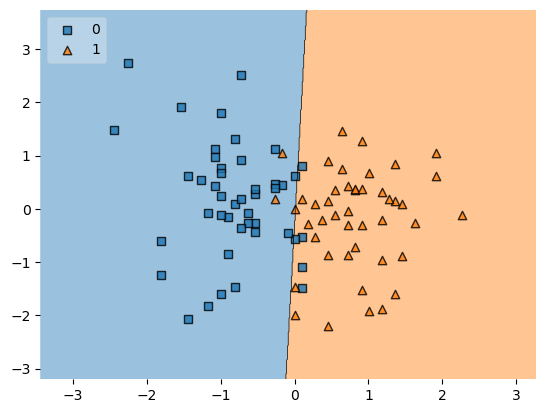

In [110]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)#clf classifier hy

In [111]:
import pickle #kisi bhi object ko file me convert kr deta hy

In [112]:
pickle.dump(clf,open('model.pkl','wb'))